In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path_athlete_events = "data/athlete_events.csv"
athlete_events_data = pd.read_csv(file_path_athlete_events)

gb_athletes = athlete_events_data[athlete_events_data['NOC'] == 'GBR']
gb_rowing = gb_athletes[gb_athletes['Sport'] == 'Rowing']

medal_trend_rowing = gb_rowing.dropna(subset=['Medal']).groupby('Year')['Medal'].count()

display(medal_trend_rowing)


Year
1900     1
1908    32
1912    24
1920    10
1924     5
1928    16
1932     6
1936     6
1948    13
1964     4
1976    11
1980    15
1984     5
1988     5
1992     5
1996     6
2000    17
2004    12
2008    23
2012    28
2016    26
Name: Medal, dtype: int64

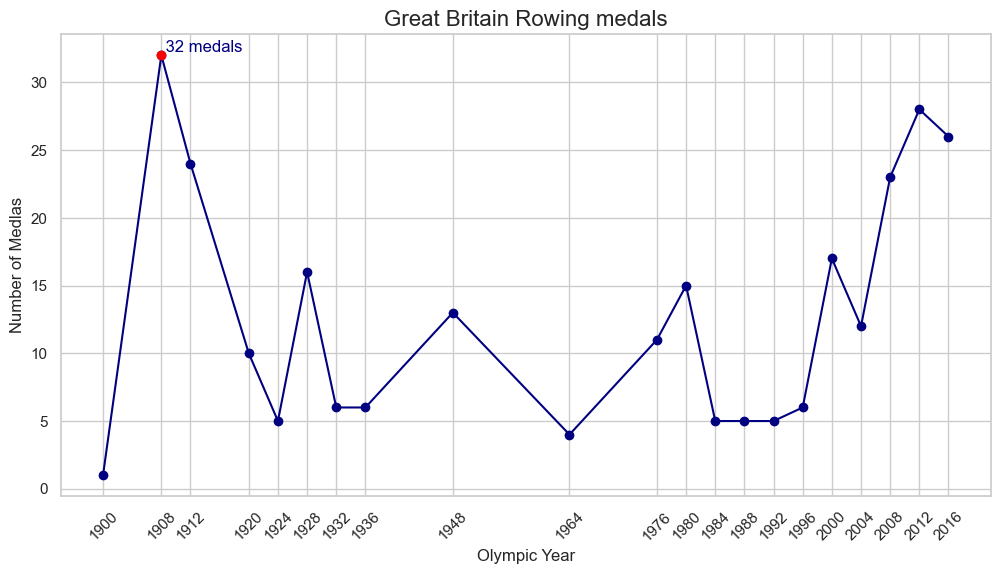

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=[12, 6])
plt.plot(medal_trend_rowing.index, medal_trend_rowing.values, marker='o', color='navy', linestyle='-')

peak_years = medal_trend_rowing[medal_trend_rowing == medal_trend_rowing.max()]
plt.scatter(peak_years.index, peak_years.values, color='red', zorder=5)

for year, medals in peak_years.items():
    plt.text(year, medals, f' {medals} medals', verticalalignment='bottom', horizontalalignment='left', color='navy')

plt.title('Great Britain Rowing medals', fontsize=16)
plt.xticks(medal_trend_rowing.index)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medlas', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout

plt.show()